In [1]:
from wflytes.dataProcessing.wfFetcher import WfFetcher
import seaborn as sns
import datetime
from tqdm.autonotebook import tqdm
tqdm.pandas()
import pandas as pd

wff = WfFetcher()

/tmp/ipykernel_3829145/2593620837.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Demonstrate Waveform Fetcher

In [2]:
# What hadms are available for sampling?
wf_name = "II"
admissions = pd.read_csv("mimiciii/ADMISSIONS.csv").sample(100)
admissions['wf_available'] = admissions['HADM_ID'].progress_apply(lambda h: wff.precheck_hadm_has_data(h, wf_name))
admissions[admissions['wf_available']]['HADM_ID']

  0%|          | 0/100 [00:00<?, ?it/s]

51764    110601
52102    134508
53732    147604
48970    177710
42957    198372
53420    135016
53413    139492
15610    123780
50476    165089
57619    112025
32694    156129
30920    165983
12160    116453
52543    102084
38576    178149
53733    121388
51331    133643
20452    137330
Name: HADM_ID, dtype: int64

<AxesSubplot:xlabel='time', ylabel='II'>

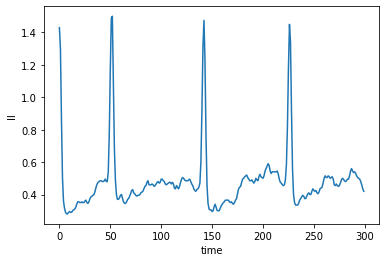

In [3]:
sample_hadm_id = 142691
sample_ii = wff.get_wf_anyinterval(sample_hadm_id, wf_name, datetime.timedelta(minutes=5), latest=True)

plot_size = 300
plottable = pd.DataFrame(data={'time': range(0, plot_size), wf_name: sample_ii[0:plot_size]})
sns.lineplot(data=plottable, x='time', y=wf_name)